In [2]:
#데이터 부르기
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
#엔코딩 후 확인
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Sex"]=label_encoder.fit_transform(df["Sex"])
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


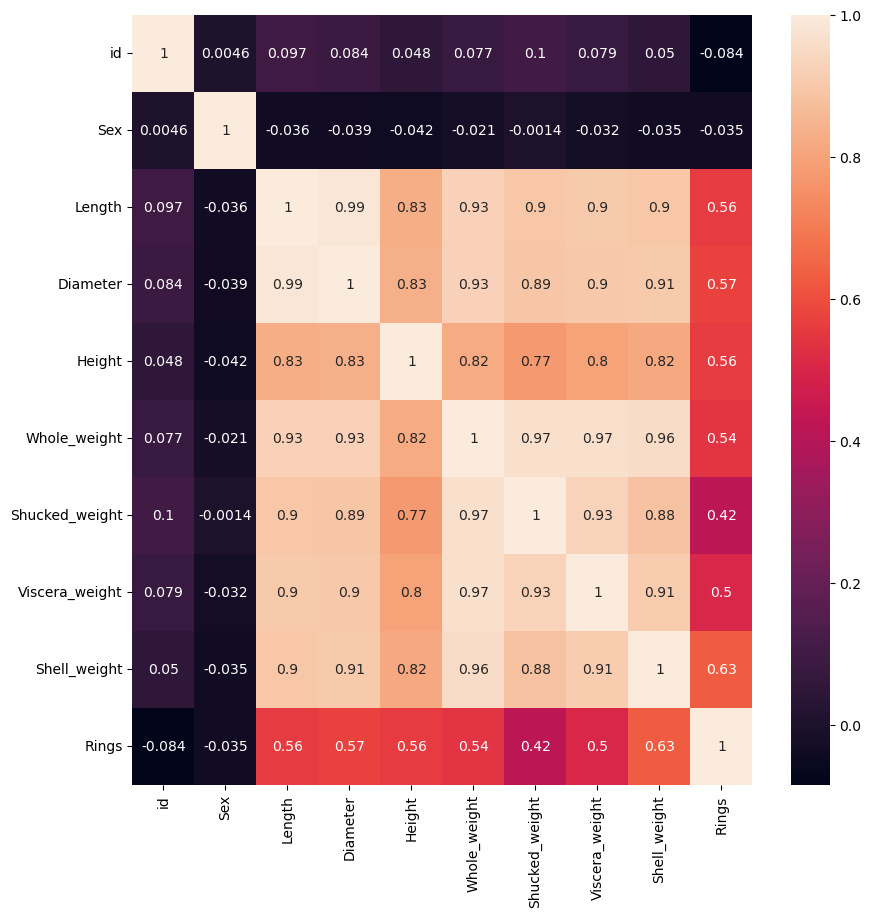

In [9]:
# 히트맵을 통한 상관관계 확인
import  seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

In [10]:
#불필요, 낮은 관계도 column 삭제
df=df.drop(["id","Sex"],axis=1)
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [12]:
#결측치 확인
df.isnull().sum()

Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [13]:
#라벨과 특성 분류
x=df.drop("Rings",axis=1)
y=df["Rings"]
print(x.shape, y.shape)

(4177, 7) (4177,)


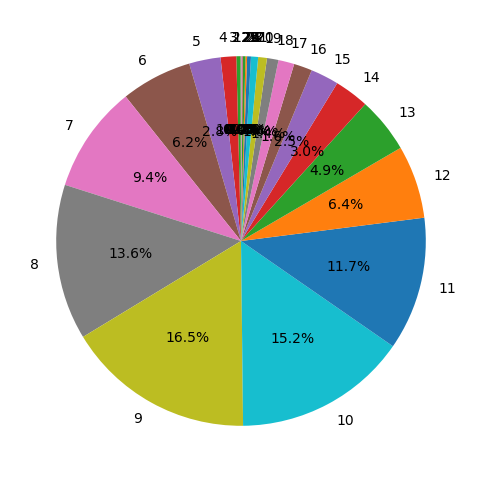

In [14]:
#레이블 확인
value_counts=y.value_counts().sort_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

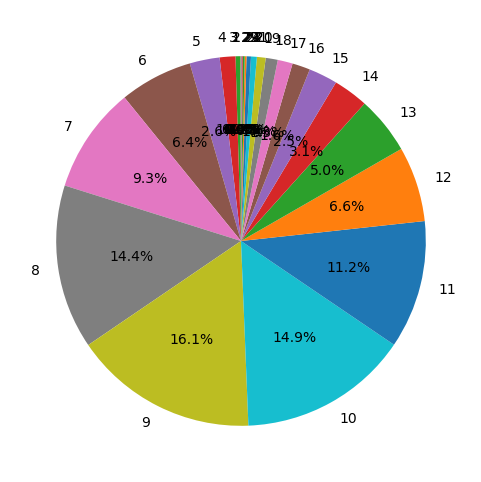

In [15]:
#train-test 세트 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
# 레이블 재확인
value_counts=y_train.value_counts().sort_index()
plt.figure(figsize=(6,6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

In [16]:
#모델 import, fit, 평균제곱근 오차 구기기
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

LR=LinearRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)

DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_pred=RF.predict(x_test)

SVR = SVR(kernel='linear')
SVR.fit(x_train,y_train)
SVR_pred=SVR.predict(x_test)

from sklearn.metrics import mean_squared_error

print("LR 평균제곱근오차 :", mean_squared_error(LR_pred,y_test))
print("DT 평균제곱근오차 :", mean_squared_error(DT_pred,y_test))
print("RF 평균제곱근오차 :", mean_squared_error(RF_pred,y_test))
print("SVR 평균제곱근오차 :", mean_squared_error(SVR_pred,y_test))

LR 평균제곱근오차 : 5.184032536683177
DT 평균제곱근오차 : 8.907177033492824
RF 평균제곱근오차 : 4.87143014354067
SVR 평균제곱근오차 : 5.75505234385812


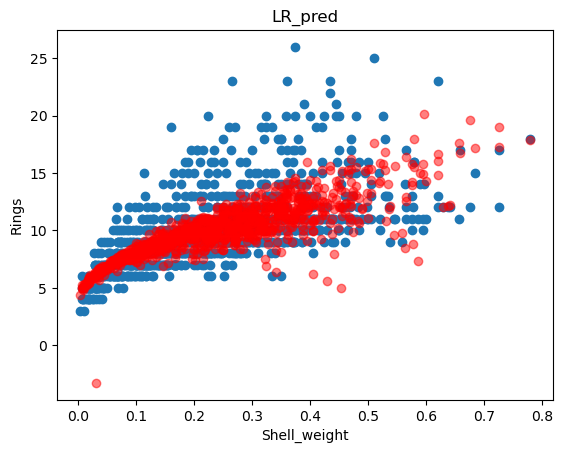

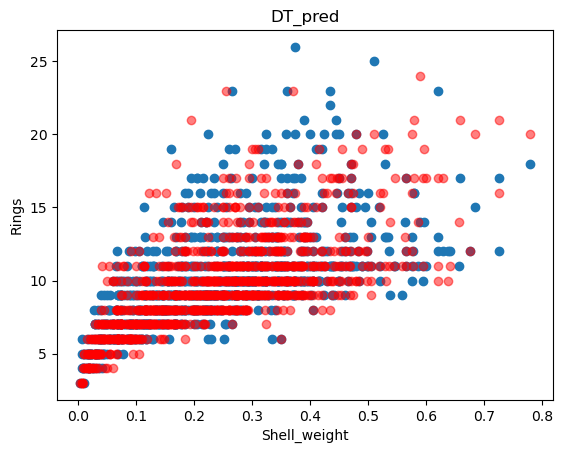

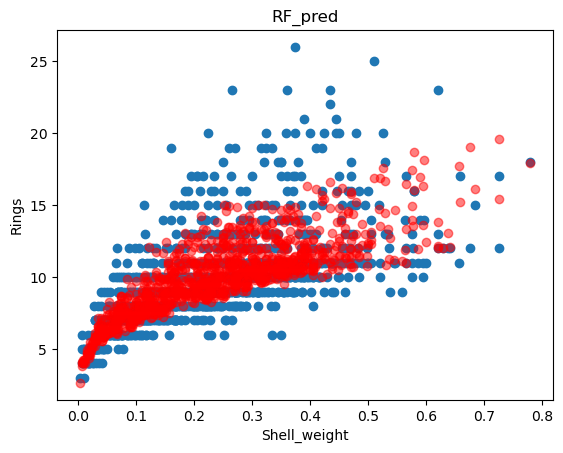

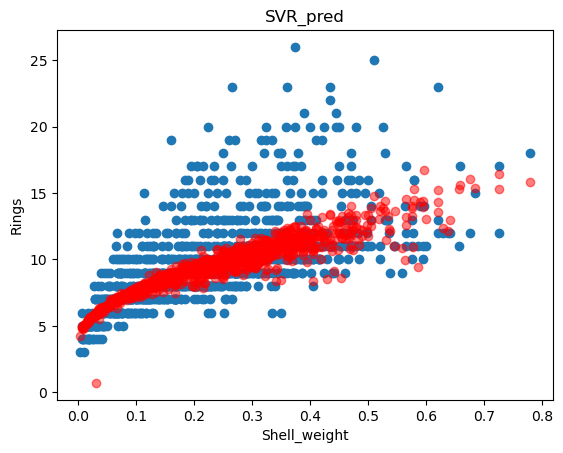

In [27]:
## 예측값과 실제값의 분포를 산점도로 확인

#LR
plt.scatter(x_test["Shell_weight"], y_test)
plt.scatter(x_test["Shell_weight"], LR_pred, c="red", alpha=0.5)
plt.title("LR_pred")
plt.xlabel("Shell_weight")
plt.ylabel("Rings")
plt.show()


#DT
plt.scatter(x_test["Shell_weight"], y_test)
plt.scatter(x_test["Shell_weight"], DT_pred, c="red", alpha=0.5)
plt.title("DT_pred")
plt.xlabel("Shell_weight")
plt.ylabel("Rings")
plt.show()


#RF
plt.scatter(x_test["Shell_weight"], y_test)
plt.scatter(x_test["Shell_weight"], RF_pred, c="red", alpha=0.5)
plt.title("RF_pred")
plt.xlabel("Shell_weight")
plt.ylabel("Rings")
plt.show()


#SVR
plt.scatter(x_test["Shell_weight"], y_test)
plt.scatter(x_test["Shell_weight"], SVR_pred, c="red", alpha=0.5)
plt.title("SVR_pred")
plt.xlabel("Shell_weight")
plt.ylabel("Rings")
plt.show()